# Esercitazione 2 - **Evapotraspirazione**
L'evapotraspirazione $ET$ descrive il processo combinato di due fenomeni: l'evaporazione dell'acqua dal suolo e l'evaporazione dell'acqua dalle piante, chiamata traspirazione. 

In entrambi i casi, il contributo di $ET$ rimane difficile da stimare sia in condizioni di laboratorio, sia in ambiente. Esistono però alcuni modelli che permettono di valutare l'evapotraspirazione attraverso opportune ipotesi. 

## non saprei cos'altro aggiungere 

L'obiettivo di questa parte di esercitazione è proprio quello di stimare l'evapotraspirazione in una data stazione attraverso tre modelli diversi:
- Penman - Monteith $\href{ https://www.fao.org/3/X0490E/x0490e06.htm}{FAO}$
- Priestley - Taylor 
- Prospero

Sarà poi possibile stimare l'evapotraspirazione tenendo conto dello $stress factor$ presente nella trattazione di Jarvis e osservare quindi le differenze tra i risultati ottenuti calcolandola in modo ideale e quelli che invece si ottengono nel secondo caso.


## recap da cancellare dopo di cosa bisogna fare:
- timeseries creator
- PT: emma
- PM: tita

calcolare effettiva evapotraspirazione con stress factor 
- parte con la radiazione = clearness index, etc (?)
- SoilEvaporation PM: Tita
- Prospero: Emma
- Tutto insieme (file 06)


Come prima cosa, è necessario creare una serie temporale che tenga conto della data di inizio e di fine di osservazione di una determinata stazione. La posizione della stazione è data dall'ID di quest'ultima.
Dopo aver importato i file necessari si passa quindi alla definizione del tempo di interesse: si imposta la data di inizio, di fine e il $time step$, che ci dà informazioni sulla distanza oraria tra una misura e la seguente.

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from timeseries_writer import *

oms_project_path = os.path.dirname(os.getcwd())
date_rng = pd.date_range(start='15/12/2013 00:00', end='16/12/2015 00:00' , freq='1H')
date_rng

DatetimeIndex(['2013-12-15 00:00:00', '2013-12-15 01:00:00',
               '2013-12-15 02:00:00', '2013-12-15 03:00:00',
               '2013-12-15 04:00:00', '2013-12-15 05:00:00',
               '2013-12-15 06:00:00', '2013-12-15 07:00:00',
               '2013-12-15 08:00:00', '2013-12-15 09:00:00',
               ...
               '2015-12-15 15:00:00', '2015-12-15 16:00:00',
               '2015-12-15 17:00:00', '2015-12-15 18:00:00',
               '2015-12-15 19:00:00', '2015-12-15 20:00:00',
               '2015-12-15 21:00:00', '2015-12-15 22:00:00',
               '2015-12-15 23:00:00', '2015-12-16 00:00:00'],
              dtype='datetime64[ns]', length=17545, freq='H')

In [2]:
os.getcwd()

'C:\\Users\\emmat\\Desktop\\Progetto idrologia\\ET'

In questo caso si è scelto di creare un DataFrame con valori variabili in modo sinusoidale:

Meleto: 1.80 ± 0.25 (Jackson, 1978) - [American Society for Horticultural Science] (http:emma//)

In [3]:
d=len(date_rng)
dataframe = np.zeros(d)

#meleto: 

m=1.55

M=2.05
for i in range(0,d):
    dataframe[i] = (m+M)/2 + ((m+M)/2-m)*np.sin(2*np.pi/(365*24)*i)

Creiamo poi un DataFrame con le date e il valore di precipitazioni cercato che, in questo caso, oscillerà in modo sinusoidale:

In [4]:
dfOut = pd.DataFrame(date_rng, columns=['date'])
dfOut['Prec'] = dataframe
dfOut.insert(loc=0, column='-', value=np.nan)
dfOut.head()

,-,date,Prec
0,NaN,2013-12-15 00:00:00,1.800000
1,NaN,2013-12-15 01:00:00,1.800179
2,NaN,2013-12-15 02:00:00,1.800359
3,NaN,2013-12-15 03:00:00,1.800538
4,NaN,2013-12-15 04:00:00,1.800717


Per avere conferma dell'andamento delle precipitazioni in funzione della data è possibile plottare il tutto come di seguito:

C:\Users\emmat\Anaconda3\envs\geoframe_verona\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


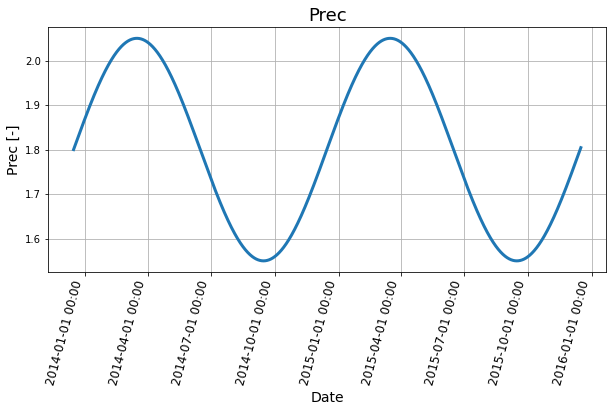

In [5]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
plt.plot(dfOut['date'],dfOut['Prec'], lineWidth =3)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Prec [-]',fontsize=14)   
plt.title('Prec',fontsize=18)
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
xlabels = ax.get_xticklabels()
ax.xaxis.get_major_ticks()
for label in xlabels:
    label.set_rotation(75)
    label.set_fontsize(12)
plt.grid()
plt.show()

Infine possiamo salvare quanto fatto in un file .csv, da utilizzare in seguito

In [6]:
os.chdir("C:\\Users\\emmat\\Desktop\\OMS_GEOET11\\data\\Cavone\\1")
write_timeseries_csv(dfOut,'LAIsinMelo.csv')



***SUCCESS writing!  LAIsinMelo.csv


## non ho ben chiaro a questo punto a cosa dovrebbe servire il file timeseries formatter, mi sembra faccia la stessa roba ma invece che prendere un valore a caso per le precipitazioni prende quello che effettivamente c'è stato